In [1]:
pip install yfinance --upgrade

     |████████████████████████████████| 6.4 MB 7.7 MB/s 
     |████████████████████████████████| 63 kB 1.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
import pandas as pd
import os
import csv
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.linear_model import LinearRegression

def obtenersp500(start='2001-01-01',finish='2021-10-22'):
    dirdes="/content/drive/MyDrive/CSV/"
    start='2001-01-01'
    finish='2021-10-22'
    sp500=pd.DataFrame()
#Lectura del csv maestro
    with open("/content/drive/MyDrive/CSV/SP500.csv","r") as f:
        reader = csv.reader(f, delimiter = ",")
        tickers=""
        for line in reader:
            tickers=line
    tickers=["AMZN"]
#Obtenemos los tikers con fechas y codigos stocks
    for tk in tickers:
        if not os.path.exists("/content/drive/MyDrive/SP500/AMZN.csv"):
            print("tk {}".format(tk))
            df=yf.download(tk, 
                      start, 
                      finish, 
                      progress=False)
            df=df.assign(Tiker=tk)   
            sp500=pd.concat([sp500, df])
              
            print("listo {}".format(tk))
        else:
            print("Ya existe {}".format(tk))
        
    sp500.to_csv("/content/drive/MyDrive/SP500/AMZN.csv")

def LeerCSV(nombre):
    dataframe = pd.read_csv(nombre,sep=",")
    #Convertimoos como indice las fechas para tratamiento de serie temporal
    dataframe["Date"]=pd.to_datetime(dataframe['Date'])
    dataframe.set_index("Date",inplace = True)
    return dataframe

#Ploteamos series por rango
def visualizardia(dataframe,fecha):
    #Para mostrar por rangos mas precisos
    dataframe.loc[fecha].plot()

################################################################
obtenersp500()
nombre_apple="/content/drive/MyDrive/CSV/AAPL.csv"

apple=LeerCSV(nombre_apple)

tk AMZN
listo AMZN


In [ ]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Tiker                object
dtype: object

In [ ]:
apple.shape

(2972, 7)

In [ ]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume,Tiker
Date,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.553026,493729600,AAPL
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.564355,601904800,AAPL
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.459940,552160000,AAPL
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.447998,477131200,AAPL
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.490864,447610800,AAPL


Validamos que no tengamos NA's o Null's en el dataframe generado

In [ ]:
apple.isnull().sum()
apple.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Tiker        0
dtype: int64

In [ ]:
type(apple)
apple.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Tiker'], dtype='object')

In [ ]:
apple["Adj Close"].describe()

<bound method NDFrame._add_numeric_operations.<locals>.mean of count    2972.000000
mean       38.989361
std        35.574936
min         5.880605
25%        16.015616
50%        25.861121
75%        45.684433
max       156.461655
Name: Adj Close, dtype: float64>

Durante los 10 años de periodo las acciones de apple, han trazado una media de 38.98 considerando las varianciones, sin embargo valdria mejor obtener un dato por periodos mas recientes debido a la alza de precios.

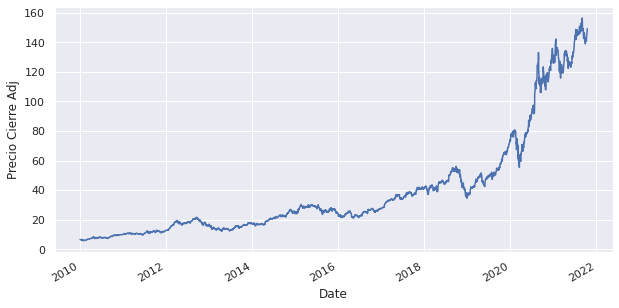

In [ ]:
#Preparamos la serie de tiempo Cierre

#serie_a=pd.concat([apple["Date"],apple["Adj Close"]],axis=1)
serie_a=apple["Adj Close"].copy()
serie_a.plot(ylabel="Precio Cierre Adj")

Crecimiento alzista obtenido desde 2010 a finales 2021

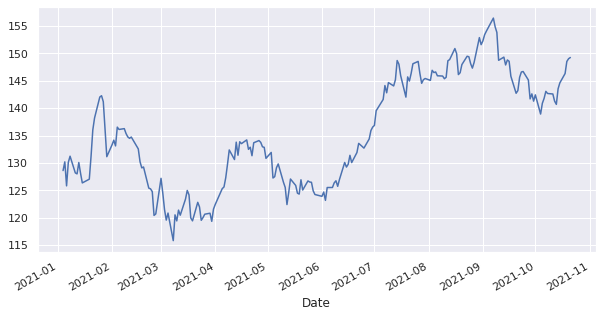

In [ ]:
visualizardia(serie_a,"2021")

In [ ]:
serie_a["2021"].describe()

count    203.000000
mean     135.374702
std       10.007369
min      115.819870
25%      126.625202
50%      133.696503
75%      145.184166
max      156.461655
Name: Adj Close, dtype: float64

Tomando una distribucion mas pequeña del gráfico, podemos darnos cuenta que la primera grafica no refleja las pequeñas variaciones que suceden en el año a simple vista.
Por ejemplo en el 2021 se registro una caida que no se recupero desde Febrero hasta Agosto.
Valor medio de las acciones fue de 135 dolares y maximo 156

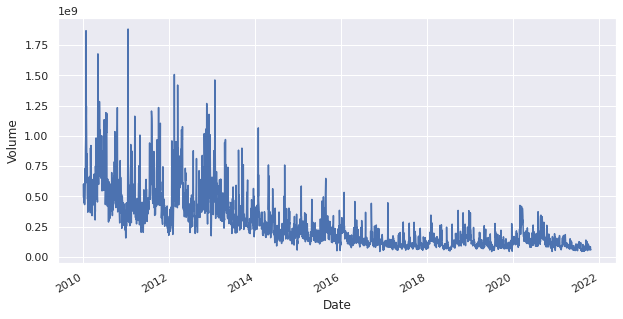

In [ ]:
#Preparamos la serie de tiempo Cierre

serie_v=apple["Volume"].copy()
serie_v.plot(ylabel="Volume")

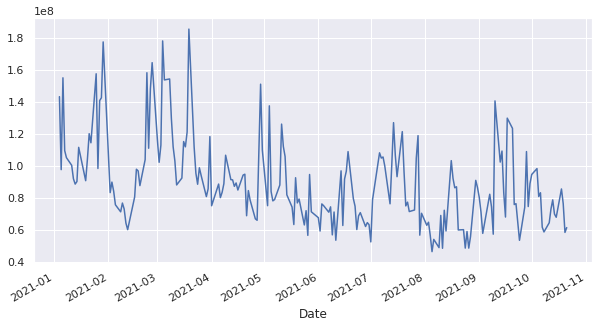

In [ ]:
visualizardia(serie_v,"2021")

Representacion del volumen de acciones intercambiadas en el año 2021 hasta inicios de Noviembre

In [ ]:
correlacion = apple.drop(columns=['Tiker']).copy()
correlacion.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999896,0.999851,0.999749,0.999641,-0.483127
High,0.999896,1.000000,0.999815,0.999869,0.999770,-0.481546
Low,0.999851,0.999815,1.000000,0.999873,0.999766,-0.486030
Close,0.999749,0.999869,0.999873,1.000000,0.999896,-0.483932
Adj Close,0.999641,0.999770,0.999766,0.999896,1.000000,-0.482949
Volume,-0.483127,-0.481546,-0.486030,-0.483932,-0.482949,1.000000


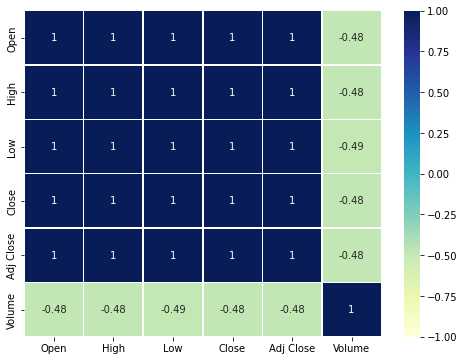

In [ ]:
plt.figure(figsize=(8, 6))
ax = sea.heatmap(correlacion.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


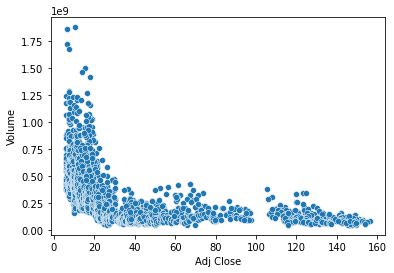

In [ ]:
sea.scatterplot(correlacion["Adj Close"], correlacion["Volume"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


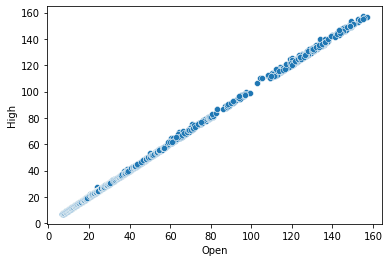

In [ ]:
sea.scatterplot(correlacion["Open"], correlacion["High"]);

In [ ]:
lr = LinearRegression()
lr.fit(correlacion["Open"].to_frame(), correlacion["High"])

LinearRegression()

In [ ]:
y_predict = lr.predict(correlacion["Open"].to_frame())

In [ ]:
y_predict

array([  7.66616462,   7.70842206,   7.70047613, ..., 148.62562455,
       150.33468627, 150.44592743])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


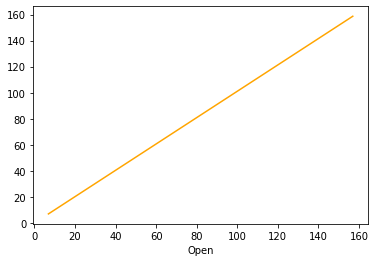

In [ ]:
sea.lineplot(correlacion["Open"], y_predict, color='orange');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


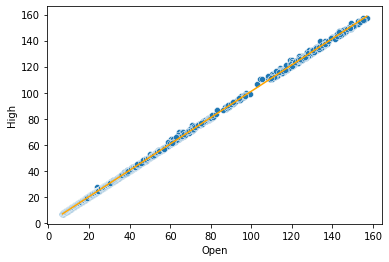

In [ ]:
sea.scatterplot(correlacion["Open"], correlacion["High"] );
sea.lineplot(correlacion["Open"], y_predict, color='orange');

In [ ]:
print(f'R2: {lr.score(correlacion["Open"].to_frame(), y_predict)}')

R2: 1.0
